In [1]:
from util import humanize_bytes
from proofs import *
from proofs_analysis import *
from perf_data import *
import matplotlib.pyplot as plt
import numpy as np

ZigZag nodes: 33554432


In [2]:
filecoin_scaling_requirements.satisfied_by(bad_performance)

False

In [3]:
ec2_x1e32_xlarge.proving_time_per_constraint / porcuquine_prover.proving_time_per_constraint

37.227600826731724

In [4]:
porcuquine = ZigZag(security=filecoin_security_requirements, instance=porcuquine_prover)

In [5]:
x1e32 = ZigZag(security=filecoin_security_requirements, instance=ec2_x1e32_xlarge, partitions=8)

In [6]:
p = porcuquine.performance()

In [7]:
pp = x1e32.performance()

In [8]:
p.total_seal_time

13622.183646812999

In [9]:
pp.total_seal_time

3562191.193646813

`pp.total_seal_time` is much higher than `p.total_seal_time` because of 8 partitions and sufficient challenges.

In [10]:
humanize_bytes(p.proof_size)

'288.0 bytes'

In [11]:
humanize_bytes(pp.proof_size)

'1.6 kB'

In [12]:
porcuquine_blake = porcuquine.scaled_for_new_hash(blake2s)

constraint_scale: 8.961805555555555
non_hashing_constraints: -607964357.0
old hashing constraints: 639454912.0; old_constraints: 31490555
new hashing constraints: 5730670582.888888; new_constraints: 5122706225.888888


In [13]:
porcuquine_blake.performance().total_seal_time

708189.0702172474

In [14]:
porcuquine.meets_performance_requirements(512 * GiB, filecoin_scaling_requirements)

True

In [15]:
x1e32.meets_performance_requirements(512 * GiB, filecoin_scaling_requirements)

False

In [16]:
porcuquine_blake.meets_performance_requirements(512 * GiB, filecoin_scaling_requirements)

True

*TODO*
  - [x] check all against a range of seal times;
  - [x] make graphs
  - [x] try with pedersen/blake hybrid, varying `root_height`
  - [x] search space for a combination of `root_height` and sector size which meets performance requirements


In [17]:
porcuquine_pb50 = porcuquine.scaled_for_new_hash(pb50)

constraint_scale: 4.980902777777778
non_hashing_constraints: -607964357.0
old hashing constraints: 639454912.0; old_constraints: 31490555
new hashing constraints: 3185062747.444444; new_constraints: 2577098390.444444


In [18]:
porcuquine_pb50.meets_performance_requirements(GiB, filecoin_scaling_requirements)

False

In [19]:
porcuquine_pb50.meets_performance_requirements(512 * GiB, filecoin_scaling_requirements)

True

In [20]:
porcuquine_pb50.meets_performance_requirements(2048 * GiB, filecoin_scaling_requirements)

True

In [21]:
porcuquine_pb50.performance().total_seal_time

360905.62693203014

In [22]:
porcuquine_pb50.performance(2048 * GiB).total_seal_time

8115.038319131881

In [23]:
porcuquine.performance(2048 * GiB).total_seal_time

9231.338661461436

In [24]:
porcuquine.performance().total_seal_time

13622.183646812999

In [25]:
filecoin_scaling_requirements.total_seal_time

7200.0

In [26]:
filecoin_scaling_requirements.proof_size

25.0

In [27]:
porcuquine.performance().proof_size

288.0

In [28]:
x1e32.performance(64 * GiB).proof_size

25.5

In [29]:
x1e32.performance(66 * GiB).proof_size

24.727272727272727

In [30]:
x1e32.performance(66 * GiB).total_seal_time

63661.7239498433

In [31]:
x1e32.performance(2048 * GiB).total_seal_time

11572.741010094249

In [32]:
x1_pb50 = x1e32.scaled_for_new_hash(pb50)

constraint_scale: 4.980902777777778
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 3185062747.444444; new_constraints: 3241832438.444444


In [33]:
x1_pb50.performance(66 * GiB).total_seal_time

258684.95376884876

In [34]:
x1_pb50.performance(2048 * 4 * GiB).total_seal_time

10266.630711245134

In [35]:
x1_blake2s = x1e32.scaled_for_new_hash(blake2s)

constraint_scale: 8.961805555555555
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 5730670582.888888; new_constraints: 5787440273.888888


In [36]:
x1_blake2s.performance(66 * GiB).total_seal_time

453708.1835878542

In [37]:
x1_pb50.meets_performance_requirements(2048 * 4 * GiB, filecoin_scaling_requirements)

True

~~**We have a first firing solution!**~~ [Not anymore…]

In [38]:
x1_blake2s.meets_performance_requirements(2048 * 4 * GiB, filecoin_scaling_requirements)

True

And another. Which has a better (lower) seal time? [**This one is still good, though — with better below.**]

In [39]:
x1_blake2s.performance(8 * 1024 * GiB).total_seal_time < x1_pb50.performance(8 * 1024 * GiB).total_seal_time

True

We have a winner, and by how much?

In [40]:
x1_pb50.performance(8 * 1024 * GiB).total_seal_time / x1_blake2s.performance(8 * 1024 * GiB).total_seal_time

1.0005067301452581

Just about double, at that size. Let's try a range, to be sure. TODO: Graph this — but instead of ratio, just include both points and pedersen. Actually just graph a spread of 10 hybrids to make the relationship clear.

constraint_scale: 8.961805555555555
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 5730670582.888888; new_constraints: 5787440273.888888
constraint_scale: 4.980902777777778
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 3185062747.444444; new_constraints: 3241832438.444444


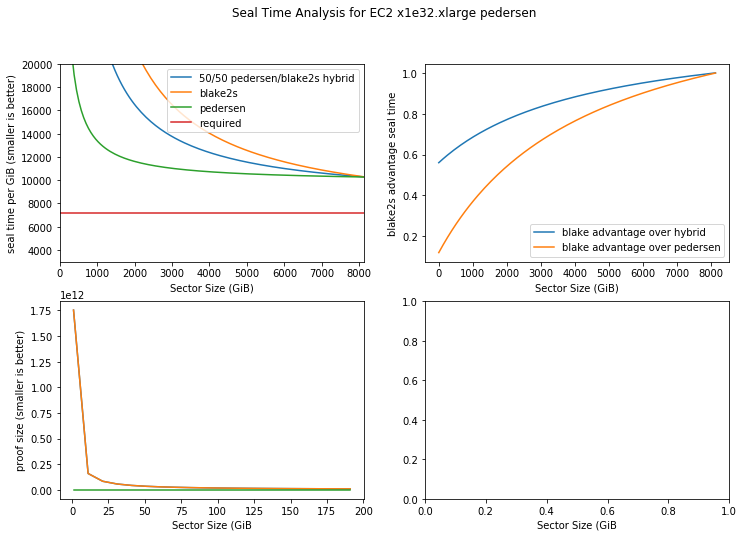

Seal rates cross at about -1.0 bytes


In [41]:
graph_hash_seal_times(x1e32, filecoin_scaling_requirements)

constraint_scale: 8.961805555555555
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 5730670582.888888; new_constraints: 5787440273.888888
constraint_scale: 8.961805555555555
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 5730670582.888888; new_constraints: 5787440273.888888
constraint_scale: 4.980902777777778
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 3185062747.444444; new_constraints: 3241832438.444444


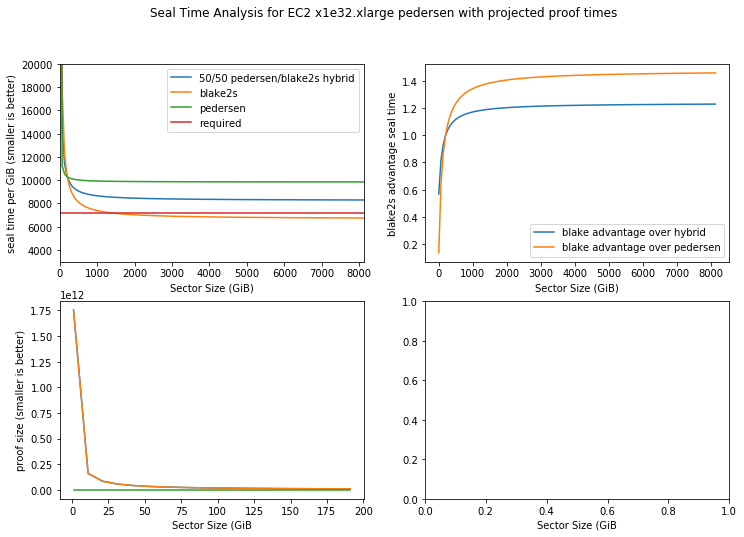

Seal rates cross at about 193.0 GB


In [42]:
projected_pedersen = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
projected_blake2s = projected_pedersen.scaled_for_new_hash(blake2s)
graph_hash_seal_times(projected_pedersen, filecoin_scaling_requirements)

What's the minimum viable sector size for a 50/50 pedersen/blake2s hybrid on x1e32?

In [43]:
humanize_bytes(x1_pb50.minimum_viable_sector_size(filecoin_scaling_requirements))

'4.0 TB'

Blake?

In [44]:
humanize_bytes(x1_blake2s.minimum_viable_sector_size(filecoin_scaling_requirements))

'4.0 TB'

Pedersen?

In [45]:
humanize_bytes(x1e32.minimum_viable_sector_size(filecoin_scaling_requirements))

'1.0 TB'

In [46]:
projected_pedersen = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
projected_blake2s = projected_pedersen.scaled_for_new_hash(blake2s)

constraint_scale: 8.961805555555555
non_hashing_constraints: 56769691.0
old hashing constraints: 639454912.0; old_constraints: 696224603
new hashing constraints: 5730670582.888888; new_constraints: 5787440273.888888


In [47]:
humanize_bytes(projected_pedersen.minimum_viable_sector_size(filecoin_scaling_requirements))

'128.0 GB'

In [48]:
humanize_bytes(projected_blake2s.minimum_viable_sector_size(filecoin_scaling_requirements))

'128.0 GB'

In [49]:
projected_blake2s.total_proving_time(128 * GiB)

728607.9523251249

In [50]:
projected_pedersen.total_proving_time(128 * GiB)

90551.348370975

Hmmmmm, something is not right with the constraint projection.